# ***CLUSTERING ASSIGNMENT***
---

### 1. What is unsupervised learning in the context of machine learning?

Unsupervised learning is a type of machine learning where the algorithm learns patterns and structures from unlabeled data. The goal is often to group similar data points (clustering) or reduce data dimensions (dimensionality reduction) without predefined categories.

---

### 2. How does K-Means clustering algorithm work?

K-Means partitions data into *k* clusters by:

1. Initializing *k* centroids randomly.
2. Assigning each data point to the nearest centroid.
3. Updating centroids by computing the mean of all assigned points.
4. Repeating steps 2–3 until convergence (no change in assignments or centroids).

---

### 3. Explain the concept of a dendrogram in hierarchical clustering?

A dendrogram is a tree-like diagram that shows the arrangement of clusters produced by hierarchical clustering. Each split or merge in the tree represents a clustering decision at a specific distance (linkage).

---

### 4. What is the main difference between K-Means and Hierarchical Clustering?

* **K-Means**: Requires a predefined number of clusters and is flat (non-hierarchical).
* **Hierarchical Clustering**: Builds a tree of clusters (no need to specify number initially) and can be agglomerative or divisive.

---

### 5. What are the advantages of DBSCAN over K-Means?

* Does not require the number of clusters to be specified.
* Can find arbitrarily shaped clusters.
* Can identify noise/outliers.
* Works better with clusters of varying densities.

---

### 6. When would you use Silhouette Score in clustering?

Use Silhouette Score to evaluate clustering quality. It measures how similar a point is to its own cluster compared to others (values range from -1 to 1). Useful for selecting the optimal number of clusters.

---

### 7. What are the limitations of Hierarchical Clustering?

* Computationally expensive (especially for large datasets).
* Sensitive to noise and outliers.
* Once merged or split, clusters cannot be undone.
* Choice of linkage method greatly affects results.

---

### 8. Why is feature scaling important in clustering algorithms like K-Means?

K-Means uses distance metrics (e.g., Euclidean). If features are on different scales, those with larger ranges dominate distance calculations, leading to biased clusters.

---

### 9. How does DBSCAN identify noise points?

Points that do not belong to any cluster (i.e., not within ε-distance of at least *minPts* other points) are labeled as **noise** or **outliers**.

---

### 10. Define inertia in the context of K-Means?

Inertia is the sum of squared distances between data points and their respective cluster centroids. Lower inertia means tighter clusters.

---

### 11. What is the elbow method in K-Means clustering?

A technique to find the optimal number of clusters by plotting inertia vs. number of clusters. The "elbow point" (where the curve bends) indicates diminishing returns and an ideal cluster count.

---

### 12. Describe the concept of "density" in DBSCAN?

Density in DBSCAN is defined by the number of points within a specified radius (ε). Dense regions with at least *minPts* within ε are considered cluster cores.

---

### 13. Can hierarchical clustering be used on categorical data?

Yes, but you must use appropriate distance metrics (e.g., Hamming distance) and potentially one-hot encoding or similarity matrices, as Euclidean distance isn’t suitable for categorical data.

---

### 14. What does a negative Silhouette Score indicate?

It suggests that a point is likely assigned to the wrong cluster, as it is closer to another cluster than its own—indicating poor clustering.

---

### 15. Explain the term "linkage criteria" in hierarchical clustering?

Linkage criteria determine how distances between clusters are computed:

* **Single linkage**: min distance between points
* **Complete linkage**: max distance
* **Average linkage**: average distance
* **Ward’s method**: minimizes variance within clusters

---

### 16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?

Because it assumes spherical, equally sized clusters and similar densities. It uses a global mean to assign points, which fails on complex or uneven data.

---

### 17. What are the core parameters in DBSCAN, and how do they influence clustering?

* **ε (epsilon)**: Radius for neighborhood search.
* **minPts**: Minimum number of points to form a dense region.
  They define what constitutes a cluster and affect sensitivity to noise and cluster shape.

---

### 18. How does K-Means++ improve upon standard K-Means initialization?

K-Means++ selects initial centroids more carefully to spread them out, reducing the chances of poor clustering and improving convergence and cluster quality.

---

### 19. What is agglomerative clustering?

A bottom-up hierarchical approach where each point starts as its own cluster, and pairs of clusters are merged based on a linkage criterion until all are merged into one tree.

---

### 20. What makes Silhouette Score a better metric than just inertia for model evaluation?

Silhouette Score considers both cohesion (within-cluster tightness) and separation (between-cluster distinctness), while inertia only considers compactness. Thus, it gives a more holistic view of cluster quality.

---



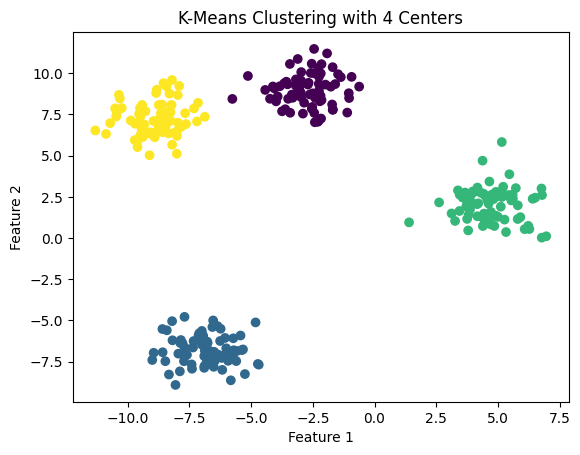

In [1]:
#21.Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot?
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=y_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with 4 Centers')
plt.show()

In [3]:
#22.Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target

agglom = AgglomerativeClustering(n_clusters=3)
agglom.fit(X)
labels = agglom.labels_

print(labels[:10])




[1 1 1 1 1 1 1 1 1 1]


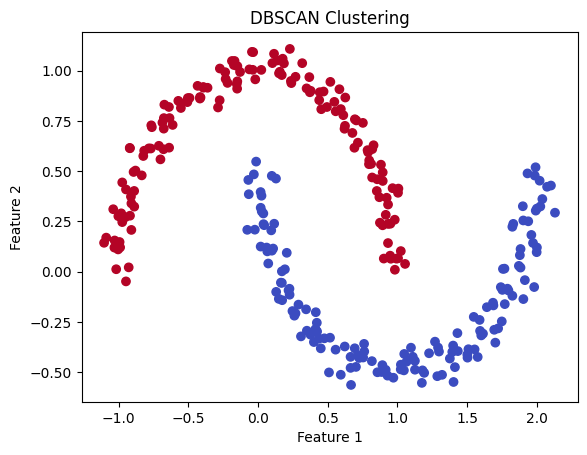

In [4]:
#23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

In [5]:
#24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

wine = load_wine()
X = wine.data
y = wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
cluster_sizes = pd.Series(kmeans.labels_).value_counts()

print(cluster_sizes)

0    65
2    62
1    51
Name: count, dtype: int64


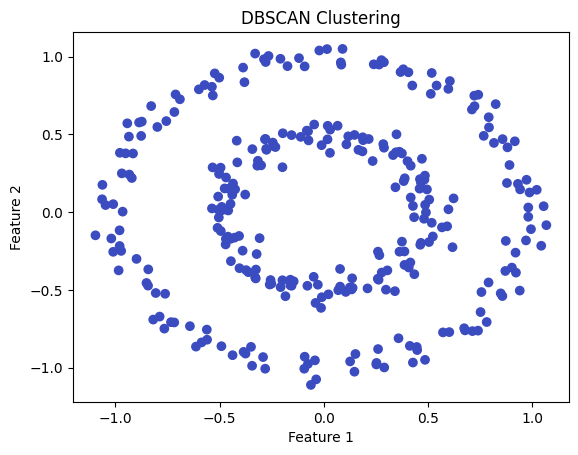

In [7]:
#25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)
y_labels = dbscan.labels_

plt.scatter(X[:, 0], X[:, 1], c=y_labels, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

In [8]:
#26.Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

data = load_breast_cancer()
X = data.data
y = data.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(X_scaled)
centroids = kmeans.cluster_centers_

print(centroids)


[[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


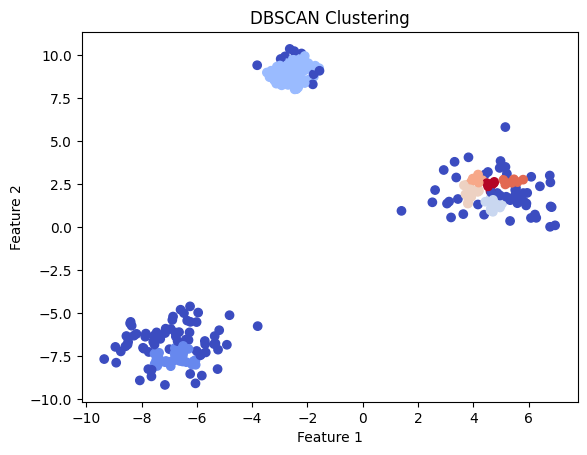

In [9]:
#27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN.
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=[0.5, 1.0, 1])

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

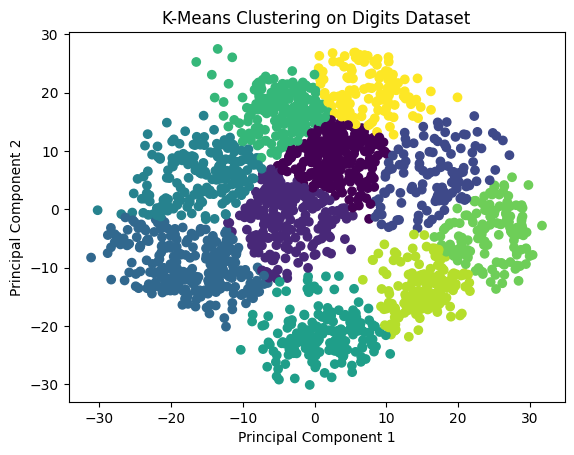

In [11]:
#28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = load_digits()
X = data.data
y = data.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_reduced)
y_labels = kmeans.labels_

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on Digits Dataset')
plt.show()

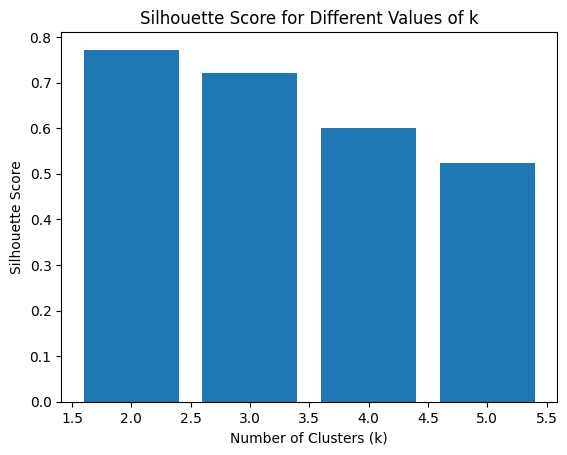

In [12]:
#29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=3, random_state=1, cluster_std=1.0)

silhouette_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.bar(range(2, 6), silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()

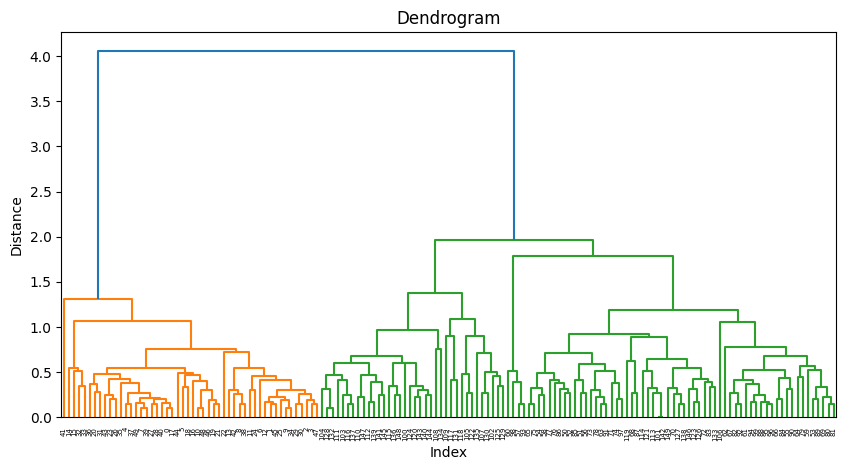

In [14]:
#30.  Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

linkage_matrix = linkage(X, method='average')

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

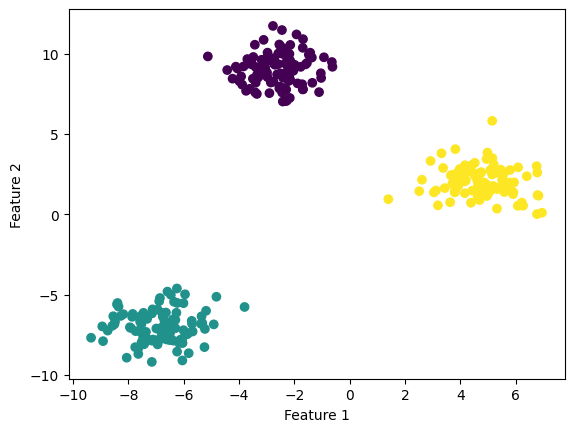

In [15]:
#31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

y_labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=y_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

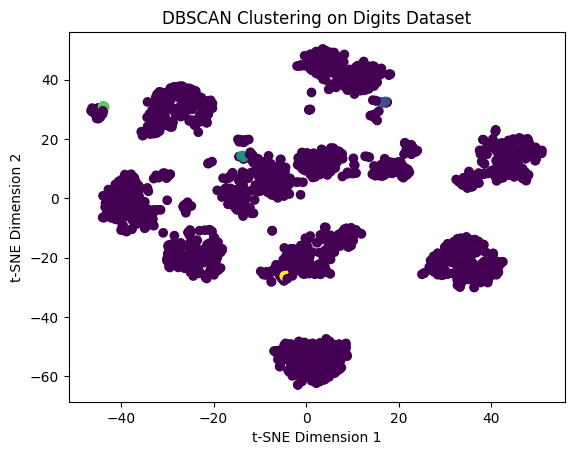

In [16]:
 #32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.
 from sklearn.datasets import load_digits
 from sklearn.manifold import TSNE
 from sklearn.cluster import DBSCAN
 import matplotlib.pyplot as plt

 data = load_digits()
 X = data.data
 y = data.target

 tsne = TSNE(n_components=2, random_state=42)
 X_reduced = tsne.fit_transform(X)

 dbscan = DBSCAN(eps=0.5, min_samples=5)
 dbscan.fit(X_reduced)

 plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=dbscan.labels_, cmap='viridis')
 plt.xlabel('t-SNE Dimension 1')
 plt.ylabel('t-SNE Dimension 2')
 plt.title('DBSCAN Clustering on Digits Dataset')
 plt.show()

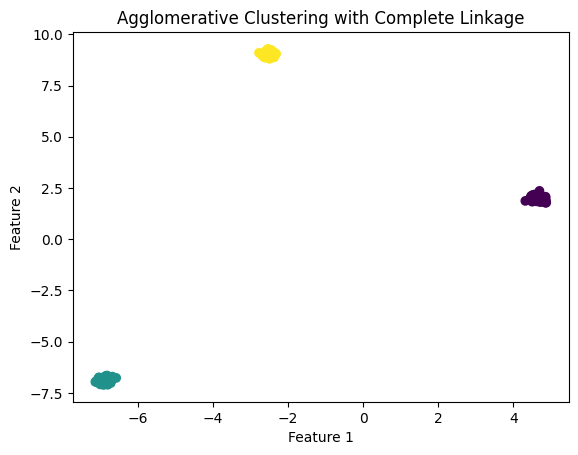

In [17]:
#33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result.
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=3, random_state=42,cluster_std=0.1)

agglom = AgglomerativeClustering(n_clusters=3, linkage='complete')
agglom.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=agglom.labels_, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Agglomerative Clustering with Complete Linkage')
plt.show()

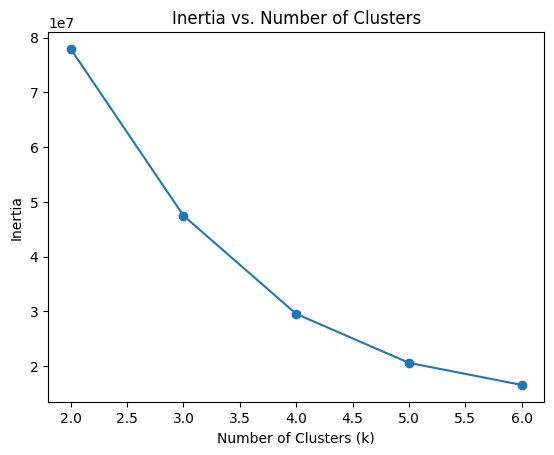

In [18]:
#34.Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

inertia_values = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
plt.plot(range(2, 7), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.show()



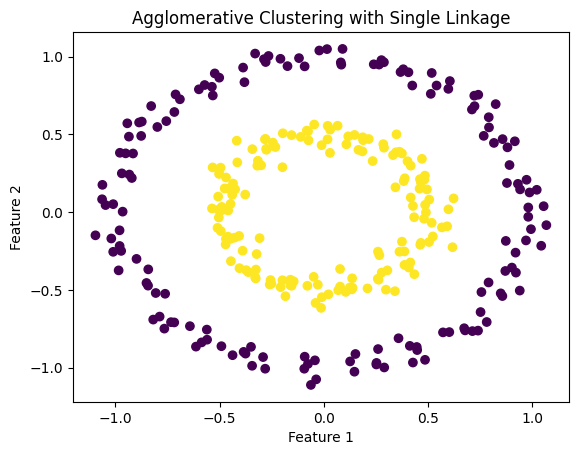

In [19]:
#35.Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage.
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)

agglom = AgglomerativeClustering(n_clusters=2, linkage='single')
agglom.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=agglom.labels_, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Agglomerative Clustering with Single Linkage')
plt.show()

In [24]:
#36.Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise).
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

wine = load_wine()
X = wine.data
y = wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.2)
dbscan.fit(X_scaled)

num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(f"Number of clusters (excluding noise): {num_clusters}")


Number of clusters (excluding noise): 0


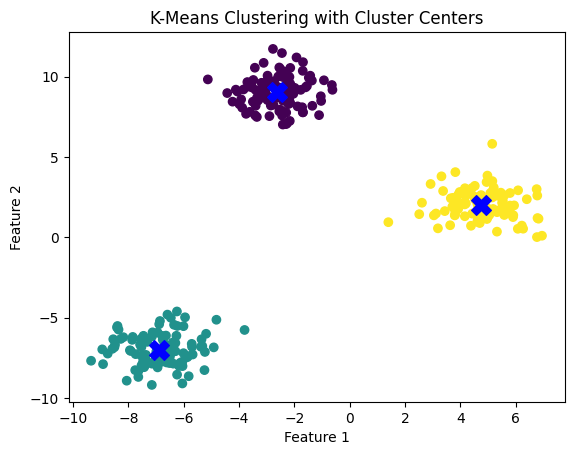

In [27]:
#37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

y_labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=y_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='blue')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with Cluster Centers')
plt.show()

In [28]:
#38.Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN

iris = load_iris()
X = iris.data
y = iris.target

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

num_noise_samples = sum(dbscan.labels_ == -1)
print(f"Number of samples identified as noise: {num_noise_samples}")


Number of samples identified as noise: 17


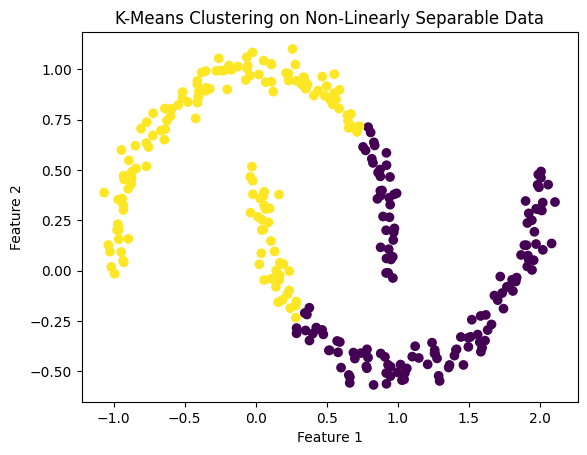

In [29]:
#39.  Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result.
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=300, noise=0.05, random_state=4)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

y_labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=y_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering on Non-Linearly Separable Data')
plt.show()


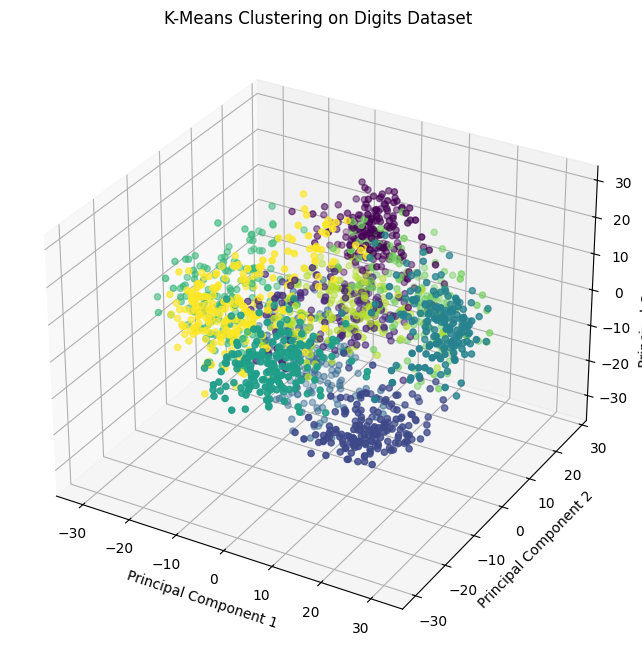

In [30]:
#40.  Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = load_digits()
X = data.data
y = data.target

pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)

plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=kmeans.labels_, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('K-Means Clustering on Digits Dataset')
plt.show()


In [31]:
#41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X, y = make_blobs(n_samples=300, centers=5, random_state=42, cluster_std=1.0)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6529948721222021


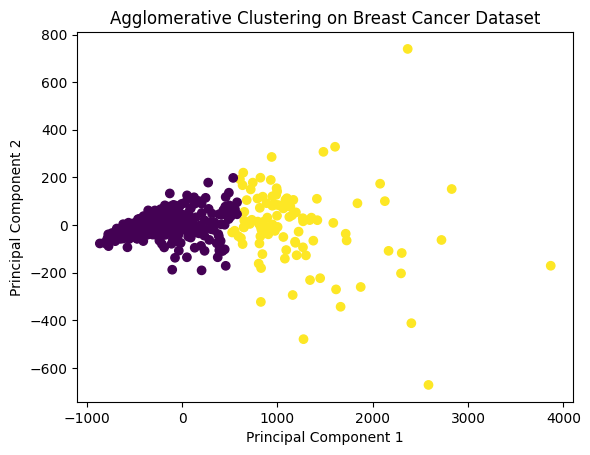

In [32]:
#42.Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D.
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

agglom = AgglomerativeClustering(n_clusters=2)
agglom.fit(X_reduced)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=agglom.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Clustering on Breast Cancer Dataset')
plt.show()

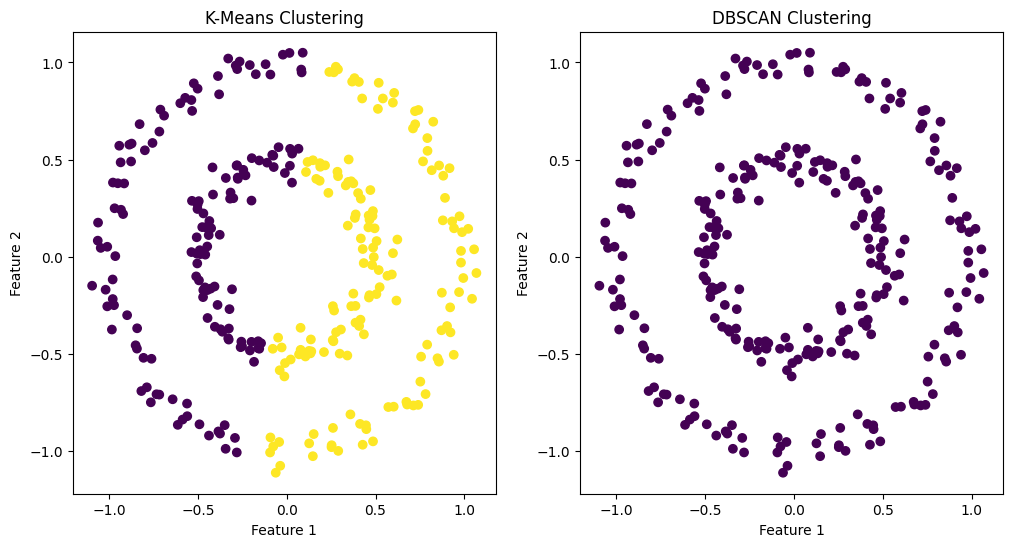

In [33]:
#43.Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side.
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()


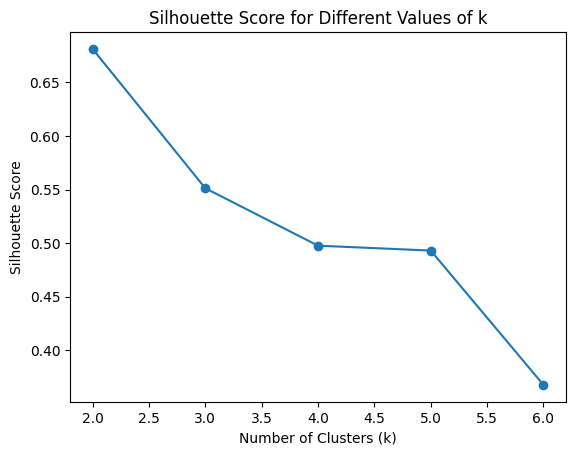

In [34]:
#44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

silhouette_scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()


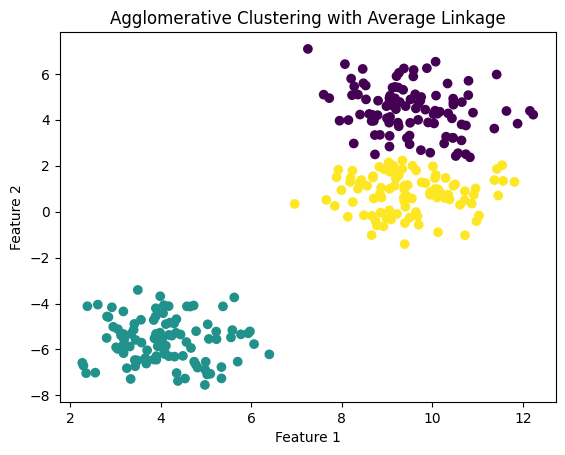

In [35]:
#45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters.
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=3, random_state=4)

agglom = AgglomerativeClustering(n_clusters=3, linkage='average')
agglom.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=agglom.labels_, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Agglomerative Clustering with Average Linkage')
plt.show()

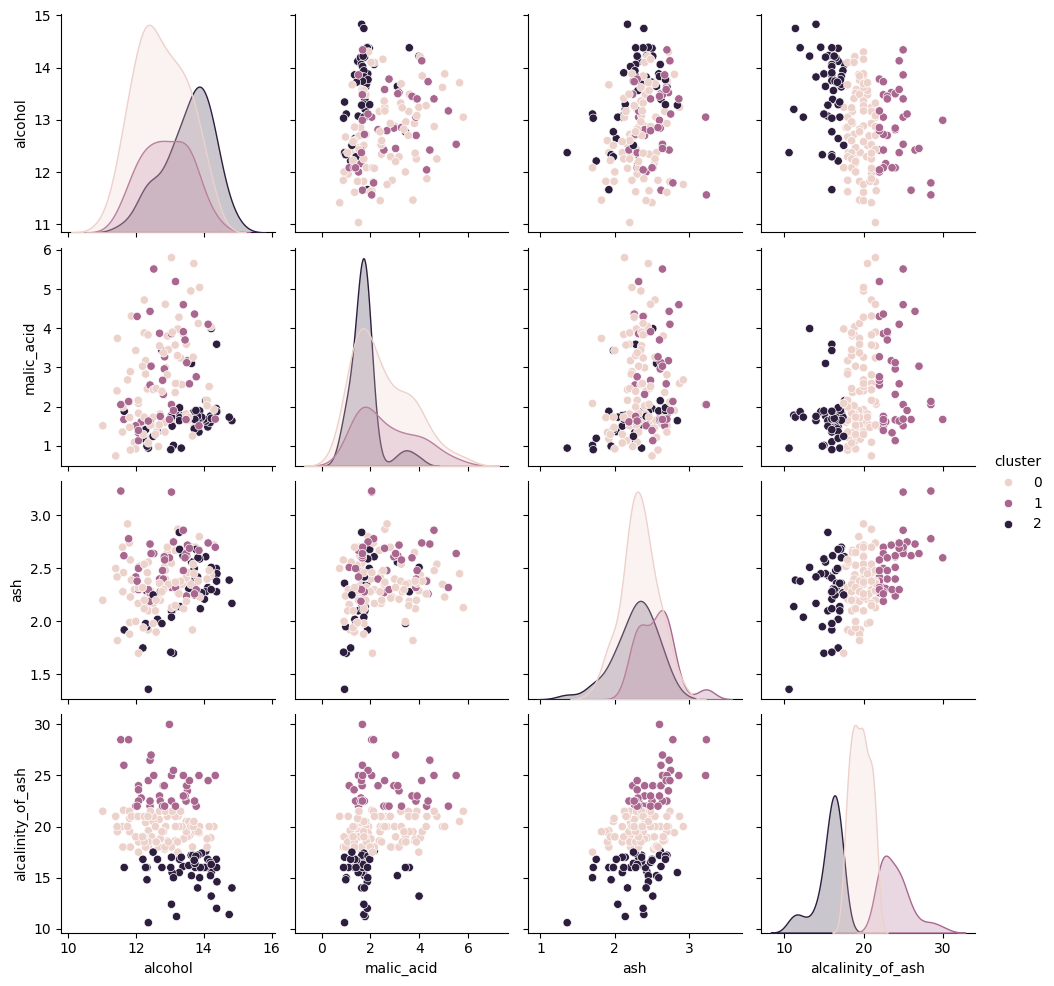

In [43]:
#46.Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features).
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
import pandas as pd

wine = load_wine()
X = wine.data
y = wine.target

X_subset = X[:, :4]

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_subset)

wine_df = pd.DataFrame(X_subset, columns=wine.feature_names[:4] )
wine_df['cluster'] = kmeans.labels_

sns.pairplot(wine_df, hue='cluster')
plt.show()


In [46]:
#47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count.
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

X,y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(f"Number of clusters: {num_clusters}")
print(f"Number of noise points: {sum(dbscan.labels_ == -1)}")

Number of clusters: 5
Number of noise points: 52


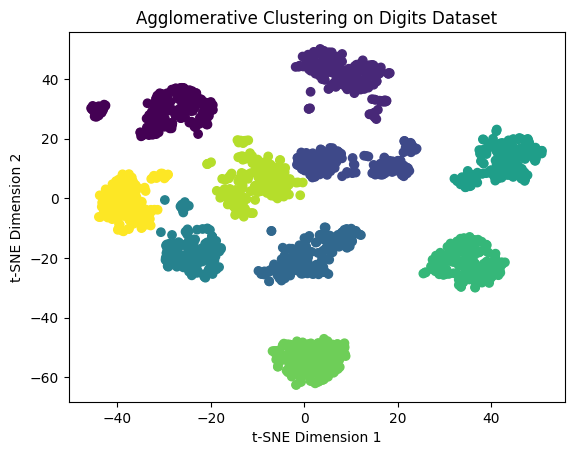

In [49]:
#48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.
from sklearn.datasets import load_digits
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

data = load_digits()
X = data.data
y = data.target

tsne = TSNE(n_components=2,random_state=1)
X_reduced = tsne.fit_transform(X)

agglom = AgglomerativeClustering(n_clusters=10, linkage='average')
agglom.fit(X_reduced)

y_labels = agglom.labels_

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_labels, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Agglomerative Clustering on Digits Dataset')
plt.show()